# Simple decision trees

>*Can you do better than the k-NN baseline with decision trees?*
> * *What accuracy can you achieve with a depth of 3?*
> * *Plot the corresponding tree with graphviz*
> * *Do you get better results if you reduce the number of dimensions with PCA first?*

I am going to start by loading features and labels from the train and test sets. I am not going to calibrate the decision tree with the validation set as the depth is already fixed (3). So I am not going to load the validation set.

In [1]:
# Import the packages needed 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# Load features and labels from npz files
with np.load('train.npz', allow_pickle=False) as npz_file:
    X_train=npz_file['features']
    y_train=npz_file['labels']
    names = npz_file['names']

with np.load('test.npz', allow_pickle=False) as npz_file:
    X_test=npz_file['features']
    y_test=npz_file['labels']

### Create a decision tree

Now I can create a decision tree with depth of 3, fit it to the train set and compute the test accuracy. 

In [3]:
# Create decision tree with depth of 3
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [4]:
# Fit decision tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [5]:
# Get test accuracy
test_accuracy=dt.score(X_test, y_test)
test_accuracy

0.7

I am going to save the test accuracy in an csv file so that we can compare the results at the end.

In [6]:
# save results in a data frame
results=pd.DataFrame({
        'model': ['decision tree'],
        'test_accuracy': '{:.3f}'.format(test_accuracy)
    })

In [7]:
# add results to csv file
pd.read_csv('results.csv').append(results).to_csv('results.csv', index=False)

### Plot the tree

Now I'm going to plot the tree with graphviz.

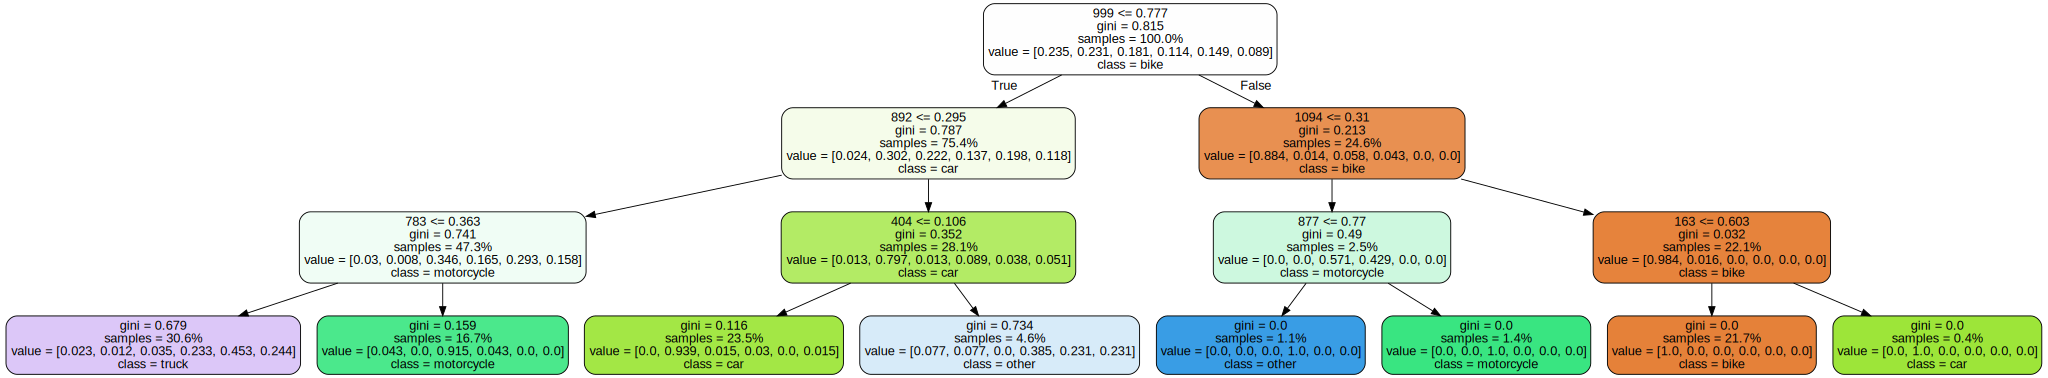

In [8]:
# Export decision tree
dot_data = export_graphviz(
    dt, out_file=None,
    # for the feature names that we will have in the random tree I chose to leave the number of the feature
    feature_names=np.arange(1280), class_names=names,
    filled=True, rounded=True, proportion=True   
)
# Display decision tree
graphviz.Source(dot_data)

### PCA

Finally, I am going to investigate whether I get better results if I reduce the number of dimensions with PCA. I am going to test this with the 2 components.

In [9]:
from sklearn.decomposition import PCA

# Create PCA transformer with 2 components
pca = PCA(n_components=2)

# Apply PCA and get components
X_train_pca=pca.fit_transform(X_train)
X_train_pca.shape

(281, 2)

In [10]:
# Create decision tree with depth of 3
dt_pca = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [11]:
# Fit decision tree
dt_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [12]:
# Get test accuracy
X_test_pca=pca.transform(X_test)
test_accuracy_pca=dt_pca.score(X_test_pca, y_test)
test_accuracy_pca

0.7833333333333333

I do get better results if I reduce the number of dimensions with PCA. PCA helps reducing overfitting.